In [1]:
import cv2
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from tqdm import tqdm


### Load and slice videos for training

In [2]:
dataset_path = 'PushUps'
filenames = glob(dataset_path + '\*.avi')

train = pd.DataFrame()
train['video_name'] = filenames
train.shape

(1, 1)

In [3]:
train_video_tag = []
for i in range(train.shape[0]):
    train_video_tag.append(train['video_name'][i].split('/')[0])

train['tag'] = train_video_tag
train.shape

(1, 2)

In [4]:
# storing the frames from training videos
for i in tqdm(range(train.shape[0])):
    count = 0
    videoFile = train['video_name'][i]
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % 2 == 0):
            # storing the frames in a new folder named train_1
            filename ='train_1/' + videoFile.split('\\')[1] +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


### Load OpenPose COCO model

In [5]:
protoFile = 'Model/pose_deploy_linevec.prototxt'
weightsFile = 'Model/pose_iter_440000.caffemodel'

In [6]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [7]:
dataset_frame_path = 'train_1'
frame_filenames = glob(dataset_frame_path + '\*.jpg')

trainFrame = pd.DataFrame()
trainFrame['frames'] = frame_filenames
trainFrame.shape

(28, 1)

In [8]:
inWidth = 368
inHeight = 368

imgPaths = []
for frame in trainFrame['frames']:
    img = cv2.imread(frame)
#     img = cv2.resize(img, (inWidth, inHeight))
    imgPaths.append(img)
    
cv2.imshow('img', imgPaths[0])
cv2.waitKey(3)

-1

In [123]:
inBlob = cv2.dnn.blobFromImages(imgPaths, 1.0/255, (imgPaths[0].shape[1], imgPaths[0].shape[0]), (0,0,0), swapRB=False, crop=False)
net.setInput(inBlob)
output = net.forward()

In [124]:
output.shape

(28, 57, 30, 40)

In [116]:
frameHeight, frameWidth, _ = output[0].shape
print(output[0][0][:].shape)

(46, 46)


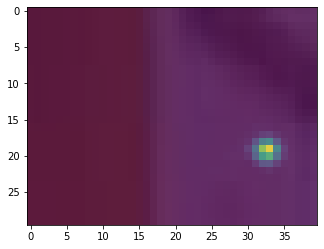

In [125]:
probMap = output[0,0,:,:]
# probMap = cv2.resize(probMap, (frameWidth, frameHeight))

plt.imshow(cv2.cvtColor(imgPaths[0], cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.7)